## **Machine Learning Project - Diabetes Prediction using Logistic Regression and KNN**

Prepared By-
 Ali Azgar Katha






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
#Load dataset
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In our dataset, the column Outcome is the dependent variable where '0' means 'no diabetes' & '1' means 'diabetes'. All the other features are the independent variables.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
#Checking for Null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### In our dataset, there are no null values.

In [ ]:
#Checking for 0 values
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Zero values in our dataset indicates the measurement errors, data entry mistakes, or missing data.Zero values in the feature Pregnancies are understandable but the physiological measurements such as glucose concentration, blood pressure, BMI, insulin levels, and skin thickness are unlikely to be exactly zero in most individuals.So we will replace the 0 values with mean values.

In [ ]:
#Replacing the 0 values with mean
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

In [ ]:
#Checking the 0 values
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


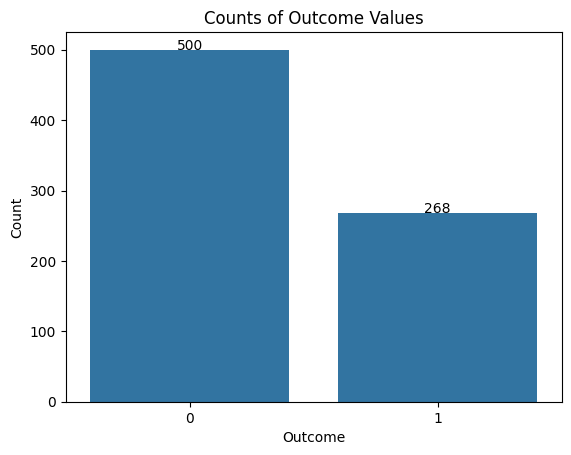

In [ ]:
# Calculate Outcome values
outcome_counts = df['Outcome'].value_counts()
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(outcome_counts.index,outcome_counts.values)

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Outcome Values')

plt.show()

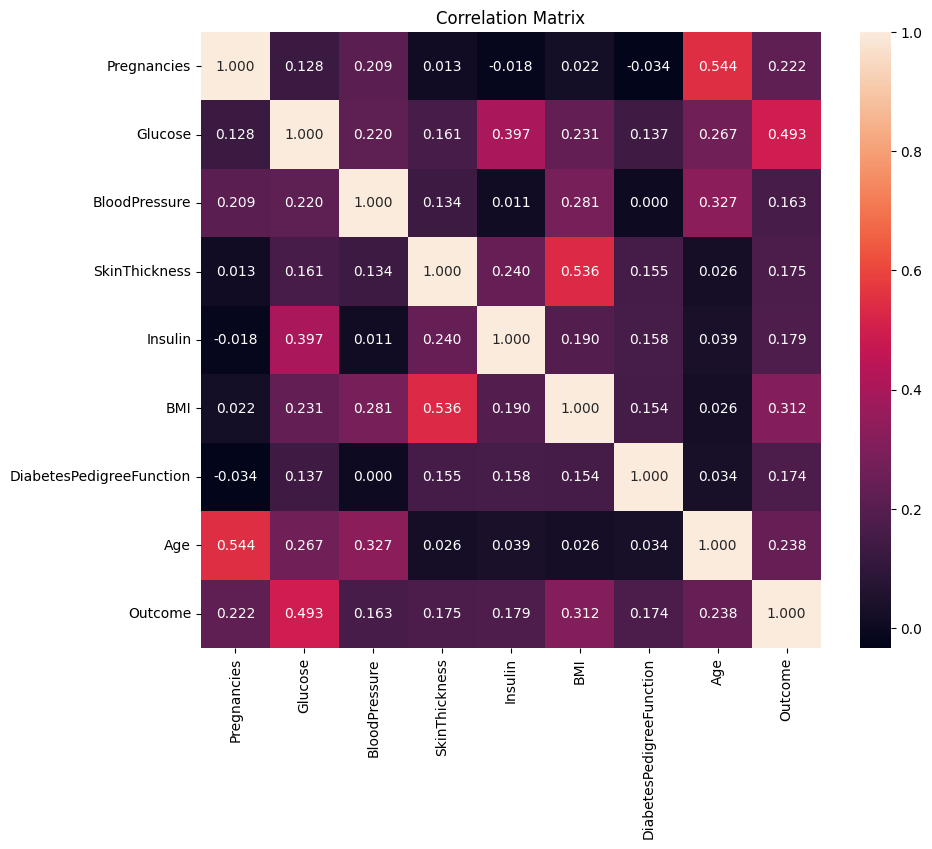

In [ ]:
# Calculating correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True,fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix we find that there is strong relation between Age & Pregnencies and BMI & SkinThickness.Additionally we find the our dependent variable Outcome has a strong relation with Glucose & BMI.

In [ ]:
#Finding outliers
Q1 = df.quantile(0.25) #first quartile (Q1) for each feature
Q3 = df.quantile(0.75) # third quartile (Q3) for each feature
IQR = Q3 - Q1 #interquartile range (IQR) for each feature

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each feature
outliers = ((df < lower_bound) | (df > upper_bound))

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outliers.sum())

Number of outliers for each feature:
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               12
Insulin                     89
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


We find the outliers of each features. We will replace the outliers from the Glucose feature with mean value as it has strong relation with Outcome.

In [ ]:
 # Replacing outliers with mean value
# 1st quartile
np.random.seed(42)
Q1_glucose = df['Glucose'].quantile(0.25)

# 3rd quartile
Q3_glucose = df['Glucose'].quantile(0.75)

# Interquartile range (IQR)
IQR_glucose = Q3_glucose - Q1_glucose

# Upper and lower bounds
lower_bound_glucose = Q1_glucose -1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

# Identify outliers for 'Glucose' and 'BMI'
outliers_glucose = (df['Glucose'] < lower_bound_glucose) | (df['Glucose'] > upper_bound_glucose)

# Replace outliers with the mean of all values for 'Glucose'
df.loc[outliers_glucose, 'Glucose'] = df['Glucose'].mean()

outliers_glucose.sum()

0

In our data set we have patients aged from 21-81. We want to make 3 groups of Age as 'young'(21-40), 'adult'(41-60), 'senior'(61-81)

In [ ]:
#Group the age
age_bins = [20, 40, 60, 82]
age_mapping = {'young': 1, 'adult': 2, 'senior': 3}
age_labels = ['young', 'adult', 'senior']
age_mapping = {'young': 1, 'adult': 2, 'senior': 3}

df['age_group'] =pd.cut(df['Age'],bins=age_bins,labels=age_labels,right=False)
df['age_group'] = df['age_group'].map(age_mapping)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,2
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,1


In [ ]:
df.shape

(768, 10)

Splitting dataset into train and test set

In [ ]:
X = df.drop('Outcome',axis=1)
y= df['Outcome']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
X_train.shape

(499, 9)

In [ ]:
X_test.shape

(269, 9)

# Grid Search for Hyperparameter Tuning

We define the range of hyperparameters to search over for both KNN (knn_param_grid) and Logistic Regression (log_reg_param_grid). We initialize GridSearchCV objects for each model with the respective hyperparameter grids and cross-validation folds (cv=5). Then, we fit the grid search models to the data using the fit() method. Finally, we print the best parameters and best scores obtained from the grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define hyperparameters grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values to search for the number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'leaf_size': [10, 20, 30, 40, 50],  # Leaf size passed to BallTree or KDTree
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Distance metric for tree
    }

# Define hyperparameters grid for Logistic Regression
logreg_param_grid = {
    'penalty': ['l1', 'l2'],  # Penalty norm
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['liblinear']  # Algorithm for optimization problem
}

# Create KNN and Logistic Regression classifier objects
knn = KNeighborsClassifier()
logreg = LogisticRegression()

# Initialize GridSearchCV for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')

# Initialize GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Fit the grid search models to the data
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
logreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
# Obtain best parameters and best estimator for KNN
best_knn_params = knn_grid_search.best_params_
best_knn_estimator = knn_grid_search.best_estimator_

# Obtain best parameters and best estimator for Logistic Regression
best_logreg_params = logreg_grid_search.best_params_
best_logreg_estimator = logreg_grid_search.best_estimator_

# Evaluate performance on test dataset
knn_test_accuracy = best_knn_estimator.score(X_test, y_test)
logreg_test_accuracy = best_logreg_estimator.score(X_test, y_test)


print(f"Best Hyperparameters for KNN: {best_knn_params}")
print(f"Best Hyperparameters for Logistics Regression: {best_logreg_params}")

Best Hyperparameters for KNN: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Hyperparameters for Logistics Regression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


Test Accuracy for KNN: 0.7174721189591078
Test Accuracy for Logistic Regression: 0.7546468401486989


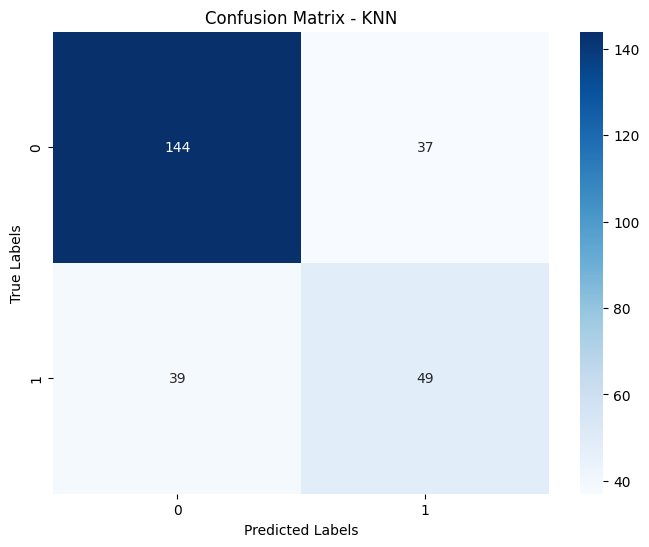

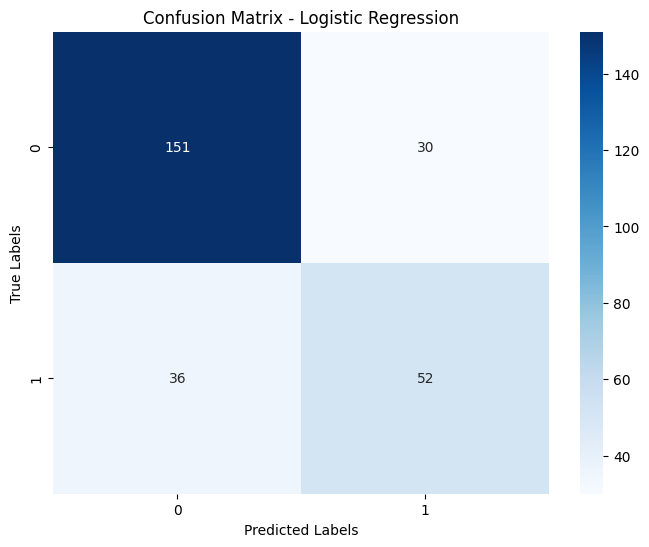

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions for KNN model
knn_predictions = best_knn_estimator.predict(X_test)

# Predictions for Logistic Regression model
logreg_predictions = best_logreg_estimator.predict(X_test)

# Confusion Matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Confusion Matrix for Logistic Regression
logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)


# Print Test Accuracies
print("Test Accuracy for KNN:", knn_test_accuracy)
print("Test Accuracy for Logistic Regression:", logreg_test_accuracy)

# Plot Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Classification Report for KNN
knn_class_report = classification_report(y_test, knn_predictions)

# Classification Report for Logistic Regression
logreg_class_report = classification_report(y_test, logreg_predictions)

# Print Classification Reports
print("Classification Report for KNN:\n", knn_class_report)
print("Classification Report for Logistic Regression:\n", logreg_class_report)


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       181
           1       0.57      0.56      0.56        88

    accuracy                           0.72       269
   macro avg       0.68      0.68      0.68       269
weighted avg       0.72      0.72      0.72       269

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       181
           1       0.63      0.59      0.61        88

    accuracy                           0.75       269
   macro avg       0.72      0.71      0.72       269
weighted avg       0.75      0.75      0.75       269



Using Logistic regression we get important features from the dataset. We select the top 6 important feature from the dataset. We find that Gluscose has the highest importance score in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

logreg_best_feature = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
logreg_best_feature.fit(X_train,y_train)

coefficients = logreg_best_feature.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
top_features = feature_importance.sort_values('Importance',ascending=False).head(6)
print("Top 6 Features:")
print(top_features)


Top 6 Features:
         Feature  Importance
1        Glucose    1.183115
5            BMI    0.771635
7            Age    0.575083
8      age_group    0.231438
0    Pregnancies    0.213854
2  BloodPressure    0.116127


Training the KNN and Logistic regression model with the top 6 features with most importance score.

In [ ]:
selected_features = ['Glucose', 'BMI', 'Age', 'age_group', 'Pregnancies', 'BloodPressure']
X_selected = df[selected_features]
y_selected = df['Outcome']

X_selected_train,X_selected_test,y_selected_train,y_selected_test = train_test_split(X_selected,y_selected,test_size=0.35,random_state=42)

In [ ]:
knn_selected = KNeighborsClassifier(leaf_size= 10, metric= 'manhattan', n_neighbors= 11, weights= 'distance')
knn_selected.fit(X_selected_train,y_selected_train)


KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=11,
                     weights='distance')

In [ ]:
logreg_selected = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
logreg_selected.fit(X_selected_train,y_selected_train)

LogisticRegression(penalty='l1', solver='liblinear')

Test Accuracy for KNN on selected features: 0.7472118959107806
Test Accuracy for Logistic Regression on selected features: 0.7509293680297398


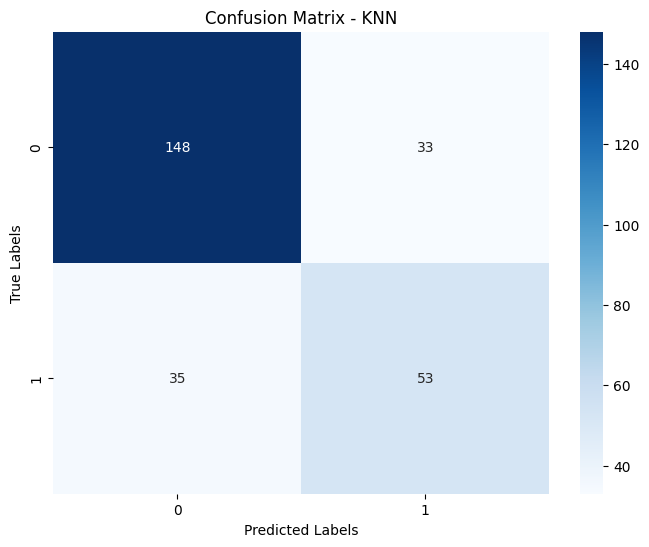

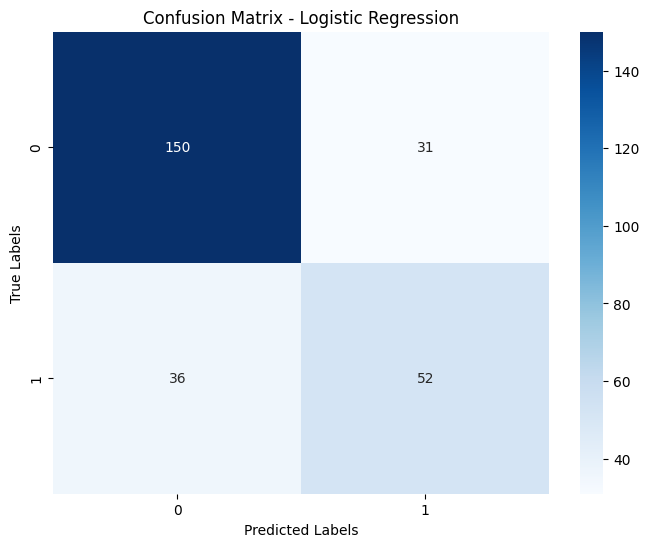

In [ ]:
knn_selected_predictions = knn_selected.predict(X_selected_test)
logreg_selected_predictions = logreg_selected.predict(X_selected_test)

knn_selected_accuracy =knn_selected.score(X_selected_test, y_selected_test)
logreg_selected_accuracy = logreg_selected.score(X_selected_test, y_selected_test)


# Confusion Matrix for KNN
knn_selected_conf_matrix = confusion_matrix(y_selected_test, knn_selected_predictions)

# Confusion Matrix for Logistic Regression
logreg_selected_conf_matrix = confusion_matrix(y_selected_test, logreg_selected_predictions)

# Print Test Accuracies
print("Test Accuracy for KNN on selected features:", knn_selected_accuracy)
print("Test Accuracy for Logistic Regression on selected features:", logreg_selected_accuracy)

# Plot Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_selected_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_selected_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

From the comparison between the performance of the models trained with the selected feature set with the performance of the models trained with the original feature set we get accuracy increase in the KNN but decrease in the logistic regeression model.

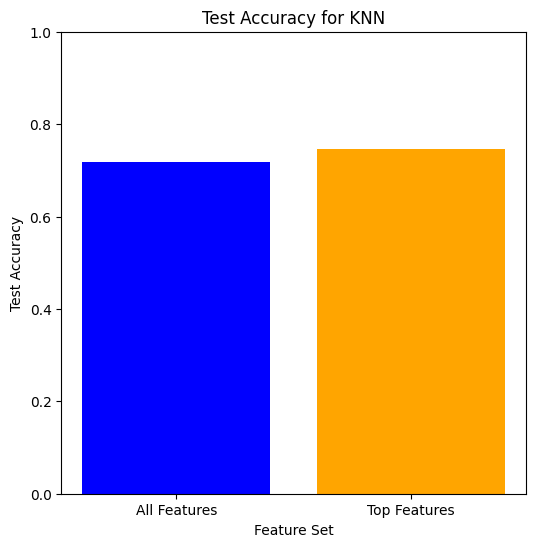

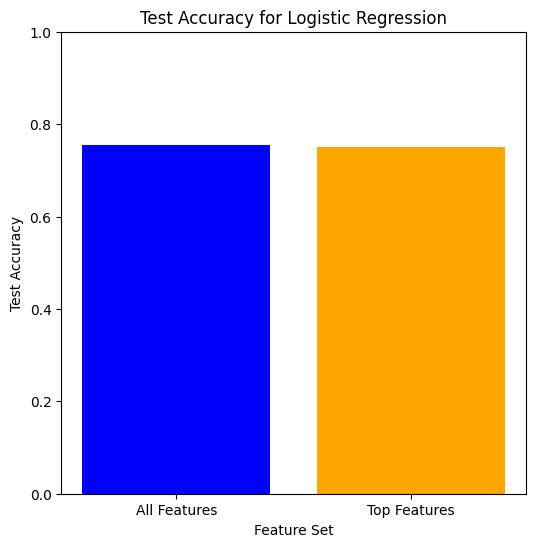

In [ ]:
import matplotlib.pyplot as plt

# Test accuracies
knn_test_accuracies = [knn_test_accuracy, knn_selected_accuracy]
logreg_test_accuracies = [logreg_test_accuracy, logreg_selected_accuracy]

# Plotting for KNN
plt.figure(figsize=(6, 6))
plt.bar(['All Features', 'Top Features'], knn_test_accuracies, color=['blue', 'orange'])
plt.title('Test Accuracy for KNN')
plt.xlabel('Feature Set')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistency
plt.show()


# Plotting for Logistic Regression
plt.figure(figsize=(6, 6))
plt.bar(['All Features', 'Top Features'], logreg_test_accuracies, color=['blue', 'orange'])
plt.title('Test Accuracy for Logistic Regression')
plt.xlabel('Feature Set')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistency
plt.show()